In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [5]:
df = pd.read_csv("/Users/cheongray/Documents/GitHub/Spam-Detection/Dataset/oversampled_2_train.csv")

In [6]:
df.head()

,enron,mmbtu,daren,http,robert,sitara,texas,april,july,gary,...,tommy,dorcheus,tennessee,ellis,offsystem,solmonson,australia,ifhsc,connevey,Label
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
column_names =[]
for column in df.columns:
    column_names.append(column)

column_names = column_names[:-1]

In [22]:
y = pd.DataFrame(df['Label'].astype('category'))
x = pd.DataFrame(df[column_names]) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
dectree = DecisionTreeClassifier()

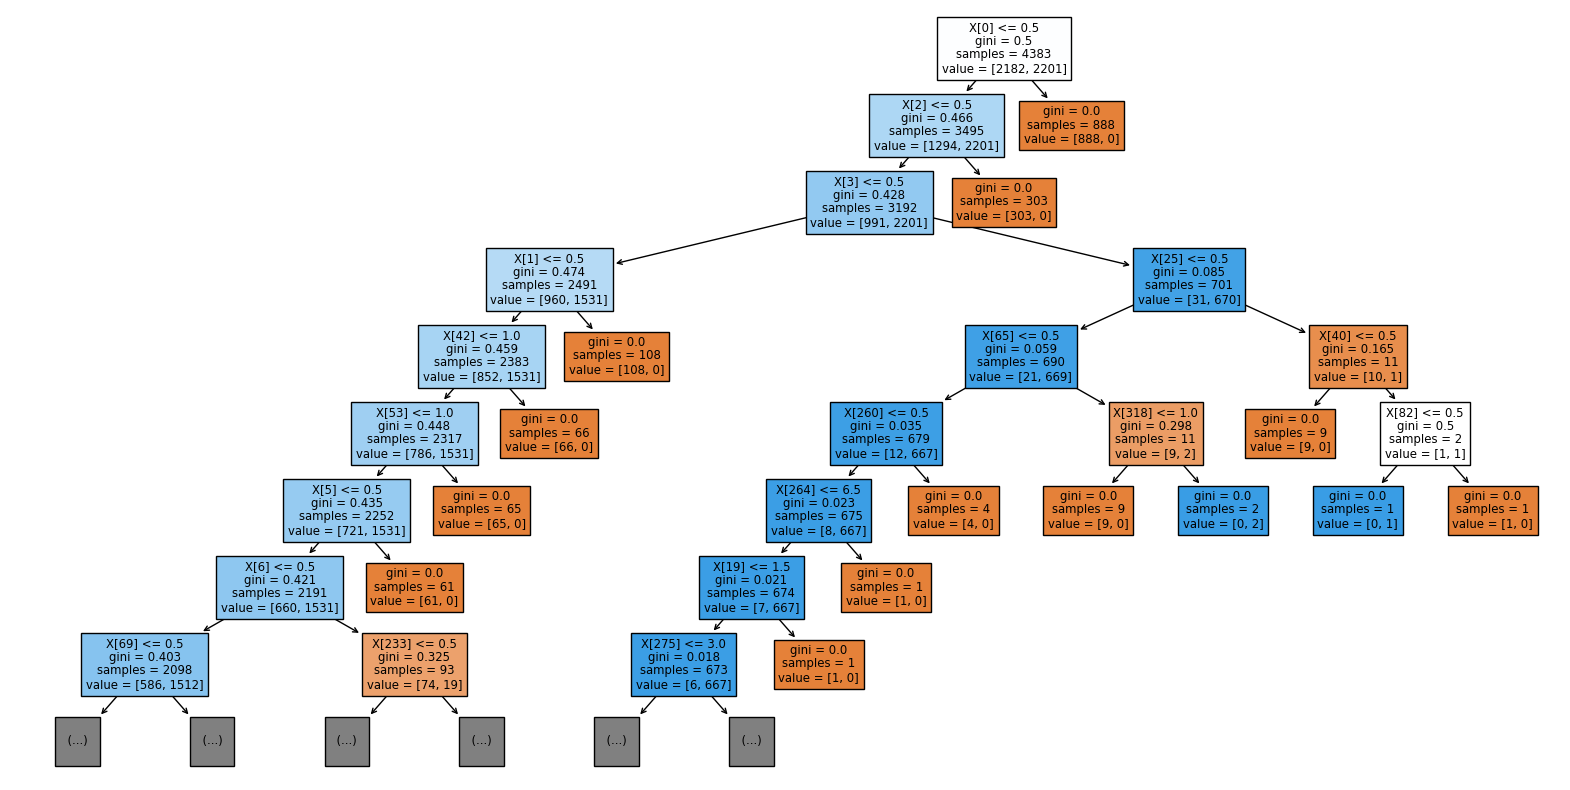

In [24]:
dectree.fit(X_train, y_train) 
plt.figure(figsize=(20,10))
plot_tree(dectree, filled=True,max_depth=8)
plt.show()

Accuracy: 97.35%
TPR Train :	 0.9954566106315311
TNR Train :	 0.9514207149404217

FPR Train :	 0.04857928505957837
FNR Train :	 0.004543389368468878


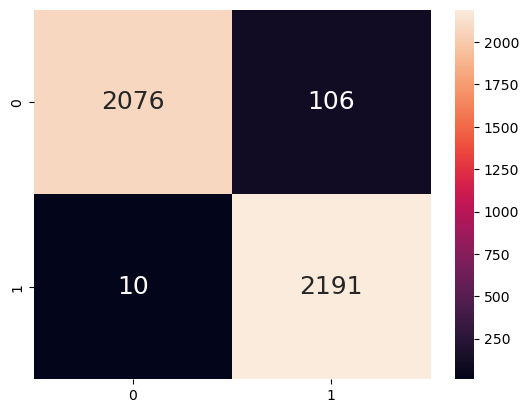

In [29]:


# Make predictions on the training data
y_train_pred = dectree.predict(X_train)

# Calculate the confusion matrix and plot it as a heatmap
conf_mat_train = confusion_matrix(y_train, y_train_pred)
sb.heatmap(conf_mat_train, annot=True, fmt=".0f", annot_kws={"size": 18})
train_accuracy = dectree.score(X_train, y_train)
# Print the accuracy measures from the confusion matrix
tp_train = conf_mat_train[1][1] # True Positives : Y (1) predicted Y (1)
fp_train = conf_mat_train[0][1] # False Positives : N (0) predicted Y (1)
tn_train = conf_mat_train[0][0] # True Negatives : N (0) predicted N (0)
fn_train = conf_mat_train[1][0] # False Negatives : Y (1) predicted N (0)

print("Accuracy: {:.2f}%".format(train_accuracy * 100))
print("TPR Train :\t", (tp_train/(tp_train + fn_train)))
print("TNR Train :\t", (tn_train/(tn_train + fp_train)))
print()

print("FPR Train :\t", (fp_train/(tn_train + fp_train)))
print("FNR Train :\t", (fn_train/(tp_train + fn_train)))


Accuracy on test data: 94.93%
TPR Test :	 0.984743411927878
TNR Test :	 0.9148648648648648

FPR Test :	 0.08513513513513514
FNR Test :	 0.015256588072122053


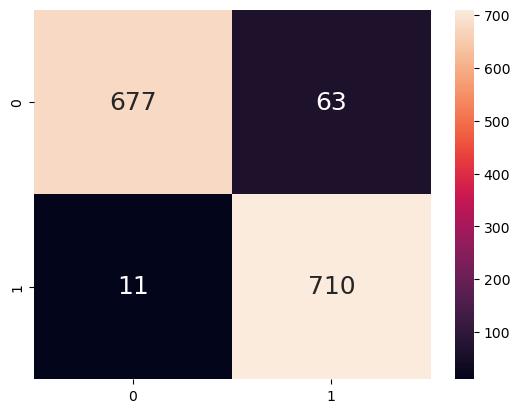

In [33]:
# Make predictions on the test data
y_test_pred = dectree.predict(X_test)

# Calculate the confusion matrix and plot it as a heatmap
test_conf_mat = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_conf_mat, annot=True, fmt=".0f", annot_kws={"size": 18})

# Print the accuracy measures from the confusion matrix for the test data
tp_test = test_conf_mat[1][1] # True Positives : Y (1) predicted Y (1)
fp_test = test_conf_mat[0][1] # False Positives : N (0) predicted Y (1)
tn_test = test_conf_mat[0][0] # True Negatives : N (0) predicted N (0)
fn_test = test_conf_mat[1][0] # False Negatives : Y (1) predicted N (0)

print("Accuracy on test data: {:.2f}%".format(dectree.score(X_test, y_test) * 100))
print("TPR Test :\t", (tp_test/(tp_test + fn_test)))
print("TNR Test :\t", (tn_test/(tn_test + fp_test)))
print()

print("FPR Test :\t", (fp_test/(tn_test + fp_test)))
print("FNR Test :\t", (fn_test/(tp_test + fn_test)))
